In [1]:
from pathlib import Path
import os
import warnings

%load_ext autoreload
%autoreload

# ignore warnings for now ...
warnings.filterwarnings('ignore')

if Path('.').absolute().parents[1].name == 'ml_drought':
    os.chdir(Path('.').absolute().parents[1])

!pwd

/Users/tommylees/github/ml_drought


In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

data_dir = Path('data/zip_data')
data_dir = Path('data/')
data_dir = Path('/Volumes/Lees_Extend/data/zip_data')
# data_dir = Path('/Volumes/Lees_Extend/data/ecmwf_sowc/data/')

assert data_dir.exists(), f'Make sure ' \
    'that you have downloaded and unzipped the ' \
    'zip_data. This contains the processed data ' \
    'required to run the Notebook!'

# Assess model performance?

In [3]:
from src.analysis import annual_scores

In [6]:
# load the monthly scores dictionary
monthly_scores = annual_scores(
    data_path=data_dir,
    models=['previous_month'],
    metrics=['rmse', 'r2'],
    verbose=False,
    to_dataframe=True
)

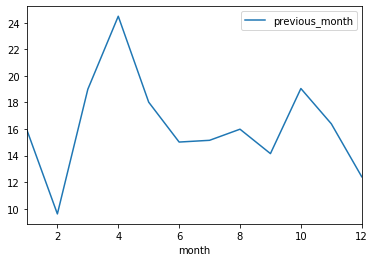

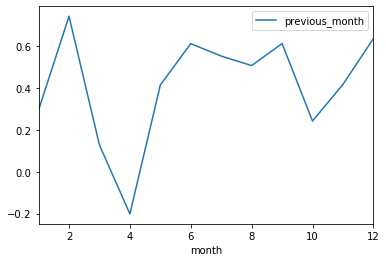

In [10]:
monthly_scores.where(monthly_scores.metric == 'rmse').plot(x='month', y='previous_month', label='')
monthly_scores.where(monthly_scores.metric == 'r2').plot(x='month', y='previous_month', label='')